In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 11. Smoothing Filter

**Detail: Implement the smoothing filter $(3*3)$.**

The smoothing filter is a filter that outputs the average value of the pixels in the filter.

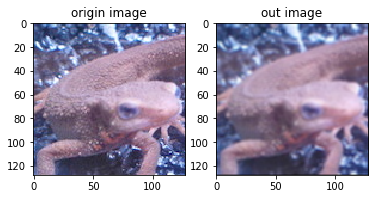

In [27]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

# Mean Filter
K_size = 3

# Zero padding
pad = K_size // 2
out = np.zeros((H+pad*2,W+pad*2,C), dtype=np.float)
out[pad:pad+H,pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[y+pad,x+pad,c] = np.mean(tmp[y:y+K_size,x:x+K_size,c])

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 12. Motion Filter

**Detail: Implement the motion filter $(3*3)$.**
The motion filter is a filter that takes the average value in the diagonal direction and is defined by the following equation.
```bash
 1/3  0   0
[ 0  1/3  0 ]
  0   0  1/3
```

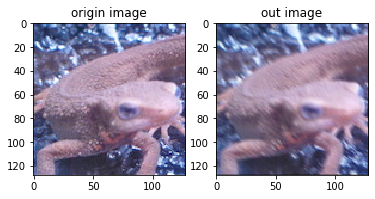

In [8]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

# Motion Filter
K_size = 3

K = np.diag([1]*K_size).astype(np.float)
K /= K_size

# Zero padding
pad = K_size // 2
out = np.zeros((H+pad*2, W+pad*2,C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y,pad+x,c] = np.sum(K*tmp[y:y+K_size,x:x+K_size,c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 13. Max-Min Filter

**Detail: Implement the Max-Min filter $(3*3)$.**

The Max-Min filter is a filter that outputs the difference between the maximum value and the minimum value of pixels in the filter, and is one of the filters for **edge detection**. Edge detection is to detect a line in an image, and an operation to extract information in such an image is called **feature extraction**. For edge detection, filtering is performed on grayscale images in many casses.

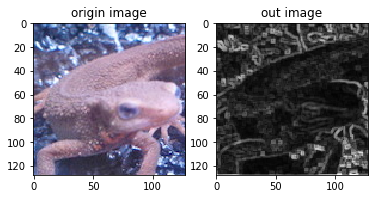

In [10]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

# Gray scale
gray = 0.2126*r + 0.7152*g + 0.0722*b
gray = gray.astype(np.uint8)

# Max-Min Filter
K_size = 3

# Zero padding
pad = K_size // 2
out = np.zeros((H+pad*2, W+pad*2),dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        out[pad+y,pad+x] = np.max(tmp[y:y+K_size,x:x+K_size]) - np.min(tmp[y:y+K_size,x:x+K_size])
        
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 14. Differential Filter

The differential filter is a filter that extracts the edge of the portion where the abrupt change in luminance occurs and take the difference between the adjancent pixels.
```bash
     (a) Vertical Direction     (b) Horizontal Direction
             0 -1  0                          0  0  0    
       K = [ 0  1  0 ]                 k = [ -1  1  0 ]
             0  0  0                          0  0  0
```

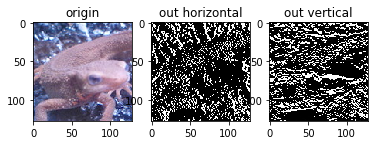

In [19]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722*b
gray = gray.astype(np.uint8)

# Differential Filter
K_size = 3

# Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_v[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out_h.copy()

# Differential vertical
K_v = [[0., -1., 0.], [0., 1., 0.], [0., 0., 0.]]
# Differential horizontal
K_h = [[0., 0., 0.], [-1., 1., 0.], [0., 0., 0.]]

for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h*(tmp[y:y+K_size, x:x+K_size]))
        out_v[pad + y, pad + x] = np.mean(K_v*(tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin')
plt.subplot(1,3,2)
plt.title('out horizontal')
plt.imshow(cv2.cvtColor(out_h,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('out vertical')
plt.imshow(cv2.cvtColor(out_v,cv2.COLOR_BGR2RGB))
plt.show()

### 15. Sobel Filter

**Detail: Implement the Sobel filter $(3*3)$**

The Sobel filter is a filter that extracts only edges in a specific direction (vertical and horizontal) and is defined by the following equation.
```bash
     (a) Horizontal Direction     (b) Vertical Direction
             1  0  -1                          1   2   1    
       K = [ 2  1  -2 ]                 k = [  0   0   0 ]
             1  0  -1                         -1  -2  -1
```

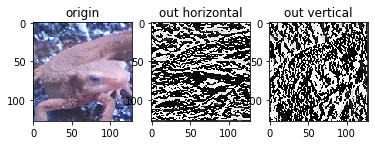

In [18]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722*b
gray = gray.astype(np.uint8)

# sobel Filter
K_size = 3

# Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_v[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out_h.copy()

# Sobel vertical
K_v = [[1., 0., -1.], [2., 0., -2.], [1., 0., -1.]]
# Sobel horizontal
K_h = [[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]]

for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h*(tmp[y:y+K_size, x:x+K_size]))
        out_v[pad + y, pad + x] = np.mean(K_v*(tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin')
plt.subplot(1,3,2)
plt.title('out horizontal')
plt.imshow(cv2.cvtColor(out_h,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('out vertical')
plt.imshow(cv2.cvtColor(out_v,cv2.COLOR_BGR2RGB))
plt.show()

### 16. Prewitt Filter

**Detail: Implement the Prewitt filter $(3*3)$**

The Prewitt filter is a type of edge extraction filter and is defined by the following equation.
```bash
     (a) Vertical Direction     (b) Horizontal Direction
            -1 -1  -1                         -1   0   1    
       K = [ 0  0   0 ]                 k = [ -1   0   1 ]
             1  1   1                         -1   0   1
```

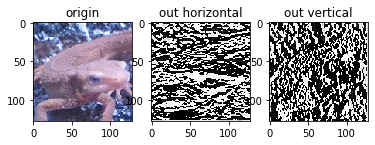

In [22]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# Prewitt Filter
K_size = 3

# Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype = np.float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_v[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out_h.copy()

# Prewitt vertical
K_v = [[-1., 0., 1.], [-1., 0., 1.], [-1., 0., 1.]]
# Prewitt horizontal
K_h = [[-1., -1., -1.], [0., 0., 0.], [1., 1., 1.]]


for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h*(tmp[y:y+K_size, x:x+K_size]))
        out_v[pad + y, pad + x] = np.mean(K_v*(tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin')
plt.subplot(1,3,2)
plt.title('out horizontal')
plt.imshow(cv2.cvtColor(out_h,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('out vertical')
plt.imshow(cv2.cvtColor(out_v,cv2.COLOR_BGR2RGB))
plt.show()

### 17. Laplacian Filter

**Detail: Implement the Laplacian filter.**

The Laplacian filter is a filter that performs edge detection by taking the second derivative of luminance.
Since the digital image is discrete data, the first-order derivatives in the x direction and the direction are expressed by the following equations, respectively.
```bash
Ix(x,y) = (I(x+1),y) - I(x,y)) / ((x+1)-x) = I(x+1,y) - I(x,y)
Iy(x,y) = (I(x,y+1) - I(x,y)) / ((y+1)-y) = I(x,y+1) - I(x,y)
```
Further, the second derivative is expressed by the following equation.
```bash
Ixx(x,y) = (Ix(x,y) - Ix(x-1,y)) / ((x+1)-x) = Ix(x,y) - Ix(x-1,y)
         = (I(x+1, y) - I(x,y)) - (I(x,y) - I(x-1,y))
         = I(x+1,y) - 2 * I(x,y) + I(x-1,y)
Iyy(x,y) = ... = I(x,y+1) - 2 * I(x,y) + I(x,y-1)
```
From these, Laplacian is defined by the following equation.
```bash
D^2 I(x,y) = Ixx(x,y) + Iyy(x,y)
           = I(x-1,y) + I(x,y-1) -4 * I(x,y) + I(x+1,y) + I(x,y+1)
```
When it is kernelized, it becomes as follows.
```bash
      0   1  0
K = [ 1  -4  1 ]
      0   1  0
```

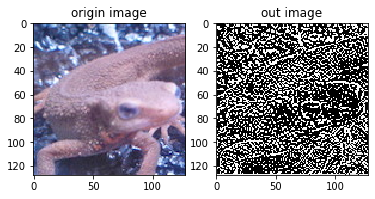

In [28]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# Laplacian Filter
k_size = 3

# Zero padding
pad = k_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out.copy()

# Labplacian vertical
K = [[0., 1., 0.],[1., -4., 1.],[0., 1., 0.]]

for y in range(H):
    for x in range(W):
        out[pad+y,pad+x] = np.mean(K*(tmp[y:y+K_size,x:x+K_size]))

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)


plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 18. Emboss Filter

**Detail: Implement the Emboss filter:**

The Emboss filter is a filter that embosses outline parts and is defined by the following equation.
```bash
     -2 -1  0
K = [-1  1  1]
      0  1  2
```

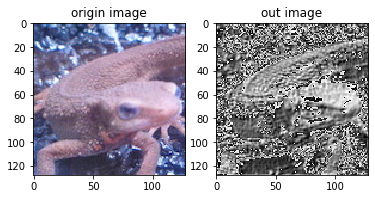

In [35]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# Emboss Filter
k_size = 3

# Zero padding
pad = k_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out.copy()

# Emboss vertical
K = [[-2., -1., 0.],[-1., 1., 1.],[0., 1., 2.]]

for y in range(H):
    for x in range(W):
        out[pad+y,pad+x] = np.sum(K*(tmp[y:y+K_size,x:x+K_size]))

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)


plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 19. LoG Filter

**Detail: Implement the LoG filter (s = 3) and detect the edge of *imori_noise.jpg*.**

The loG filter is the Laplacian of Gaussian, which filters the image with the Gaussian filter and then takes out the outline with the Laplacian filter.

Since the Laplcian filter takes a second derivative, noise is suppressed in advance by a Gaussian filter in order to prevent noise from being emphasized.

The LoG filter is defined by the following equation.

```bash
LoG(x,y) = (x^2 + y^2 - s^2) / (2*pi*s^6) * exp (-(x^2 + y ^2) / (2*s^2))
```

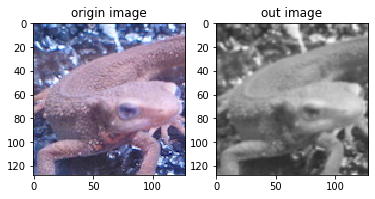

In [37]:
img = cv2.imread("Dataset/others/imori.jpg")
H,W,C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# LoG Filter
k_size = 5
s = 3

# Zero padding
pad = k_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

# Kernel
K = np.zeros((K_size,K_size),dtype=np.float)

for x in range(-pad,-pad+K_size):
    for y in range(-pad,-pad+K_size):
        K[y+pad, x+pad] = (x**2 + y**2 - s**2) * np.exp(-(x**2+y**2) / (2*(s**2)))
K /= (2 * np.pi * (s**6))

K /= K.sum()


for y in range(H):
    for x in range(W):
        out[pad+y,pad+x] = np.sum(K*(tmp[y:y+K_size,x:x+K_size]))

out = out[pad:pad+H,pad:pad+W].astype(np.uint8)


plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 20. Histogram Display

**Detail: Use matplotlib to display the histogram of *imori_dark.jpg*.**

A histogram is a graph of the appearance frequency of pixels. I matplotlib, there is already a function called **hist( )**, so use it.

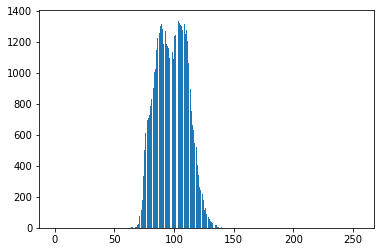

In [38]:
img = cv2.imread("Dataset/others/imori_dark.jpg").astype(np.float)

# Display histogram
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.show()

### What are the differences in first order derivative edge detection algorithms and second order edge detection algorithms?

**A) First Order Derivative Edge Detection.** Generally, the first order derivative operators are very sensitive to noise and produce thicker edges.

a.1)  **Roberts** filtering: diagonal edge gradients, susceptible to fluctations. Gives no information about edge orientation and works best with binary images.

a.2)  **Prewitt** filter: The Prewitt operator is a discrete differentiation operator which functions similar to the Sobel operator, by computing the gradient for the image intensity function. Makes use of the maximum directional gradient. As compared to Sobel, the Prewitt masks are simpler to implement but are very sensitive to noise. 

a.3)  **Sobel** filter: Detects edges are where the gradient magnitude is high.This makes the Sobel edge detector more sensitive to diagonal edge than horizontal and vertical edges. 
Sobel and Prewitt methods are very effectively providing good edge maps.

a.4)  **Frei-Chen** method: Frei and Chen have adapted the Sobel’s model and proposed a pair of isotropic operator which makes K = SQRT(2) . This makes the gradient for horizontal, vertical, and diagonal edges the same at the edge center. The isotropic smoothed weighting operator proposed by Frei and Chen can easily pick up subtle edge detail and produce thinner edge lines, but it also increase the possibility of erroneously detect noise as real edge points. 

a.5) **Kirsch** compass kernel: Is a non-linear edge detector that finds the maximum edge strength in a few predetermined directions. Kirsch edge operators have been proposed for image segmentation of mammographic images.

a.6) **Robinson compass filtering:** Similar to the Kirsch masks, with mask coefficients of 0, 1, and 2.
Kirsch and Robinson methods require more time for calculation and their results are not better than the ones produced by Sobel and Prewitt methods.

a.7) **Nevatia / Babu:** detects edges in various degree increments


**B) 2nd Order Derivative Edge Detection.** If there is a significant spatial change in the second derivative, an edge is detected. 2nd Order Derivative operators are more sophisticated methods towards automatized edge detection, however, still very noise-sensitive.

As differentiation amplifies noise, smoothing is suggested prior to applying the Laplacians. In that context, typical examples of 2nd order derivative edge detection are the Difference of Gaussian (DOG) and the Laplacian of Gaussian (LoG) (e.g.the Marr - Hildreth method).
Image derivatives are used in motion estimation and object tracking in video.

Concluding, I personally believe that a good practice in order to choose the optimal edge detection method is to first identify the edge profile of the objects to be detected in an image (step edges / ramp edges /line or roof edges). Which edge detection method to use, it also strongly depends from the application domain as well...

https://www.researchgate.net/post/What_are_the_differences_in_first_order_derivative_edge_detection_algorithms_and_second_order_edge_detection_algorithms